# Gradient Descent

## The idea  

<img src="./files/gradient descent.png" width=60%/>


## Linear Regression

###  Loss function: Mean Squared Loss 
(Not to be confused with the Mean square error in a paramater estimate)


$$ L = \frac{1}{n} \sum d_i^2 = \frac{1}{n} \sum (\hat{y_i} - y) ^ 2 $$


* Remember that $ \hat{y_i} $ is a function of $ a $ and $ b $ which is what we wish to optimize. 


$$ a^* \;,\; b^* = arg min_{(a, b)} L $$

$$ \frac{\partial L}{\partial a} = \frac{2}{n} \sum \; (\hat{y_i} - y_i) $$

$$ \frac{\partial L}{\partial b} = \frac{2}{n} \sum \; (\hat{y_i} - y_i) \; x_i $$

### Gradient update rule:

$$ a_{n+1} = a_n - \eta * \frac{\partial L}{\partial a} $$

$$ b_{n+1} = b_n - \eta * \frac{\partial L}{\partial b} $$



### When do we use Gradient Descent instead of calculating the global optimum like we did for the single variable case

<img src="./files/why_gd.png" width=70%/>


(Slide from https://people.eecs.berkeley.edu/~jegonzal/assets/slides/linear_regression.pdf) 

## Loss functions

### Mean Squared Error

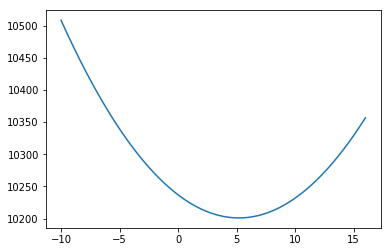

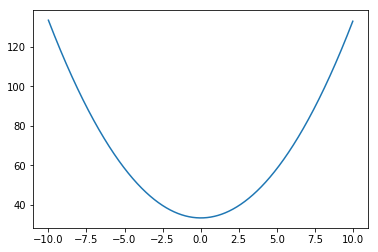

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

x = np.arange(-2, 2, 1/200)
y = 5*x

b = np.arange(-10, 16, 1/2000)
a = np.arange(-10, 10, 1/2000)
def f(a, b):
    return np.mean((a + b*x - y) ** 2)

h = [f(101, r) for r in b]
plt.plot(b, h)
plt.show()

h = [f(r, 10) for r in a]
plt.plot(a, h)
plt.show()

# Classification

* Binary classification


*  Multi-class classification: Can be transformed into many binary classification problem


<img src="./files/classify.png" width=50%/>


Note: We deal mostly with Binary classification

## Linear classification model

**Aim : Find a *linear* boundary that separates the two regions **

<img src="./files/linear_non_linear.png" width=60%/>

**Is the following data linearly separable**

<img src="./files/circular.png" width=60%/>

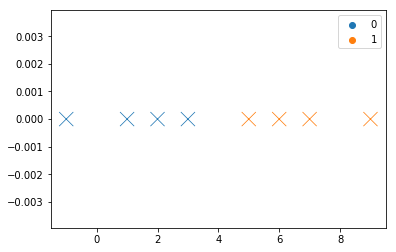

In [4]:
x = np.array([-1, 1, 2, 3, 5, 6, 7, 9])
sns.scatterplot(x, [0]*len(x), marker="x", hue=np.array([0, 0, 0, 0, 1, 1, 1, 1]), s=200)

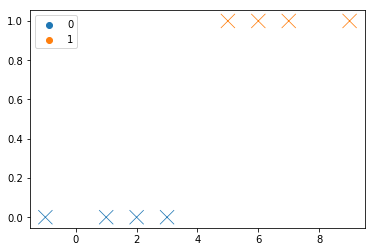

In [5]:
x = np.array([-1, 1, 2, 3, 5, 6, 7, 9])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
sns.scatterplot(x, y, marker="x", hue=y, s=200)

## How do we solve this?

## Intuition

* We predict the probability that a point belongs to class 1.


* The points away from the boundary are assigned a probability close to the exteremes i.e 0 and 1. (Certainty)


* The points near the boundary are assigned probabilities close to 0.5. (Uncertainty)


* The function which helps to do this is the sigmoid function

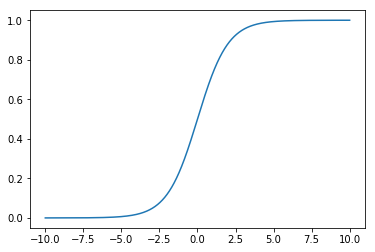

In [4]:
def sigmoid(x):
    return 1 / (np.exp(-x) + 1)

d = np.arange(-10, 10, 1/2000)
plt.plot(d, sigmoid(d))

* All we need is a function which gives us a measure of how far a point is from the line a + bx. It should also tells which side of the line the point lies in


* Just evaluating a + b * x for a particular x gives us the required measure

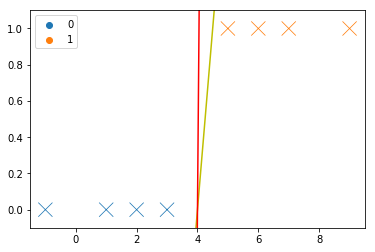

In [16]:
x = np.array([-1, 1, 2, 3, 5, 6, 7, 9])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
ax = plt.gca()
ax.set_ylim(-0.1, 1.1)
sns.scatterplot(x, y, marker="x", hue=y, s=200)
plt.plot(x, 2*x - 8, c="y")
plt.plot(x, 20*x - 80, c="r")
plt.show()

In [6]:
2*x - 8

array([-10,  -6,  -4,  -2,   2,   4,   6,  10])

In [17]:
20*x - 80

array([-100,  -60,  -40,  -20,   20,   40,   60,  100])

## Logistic Regression solution

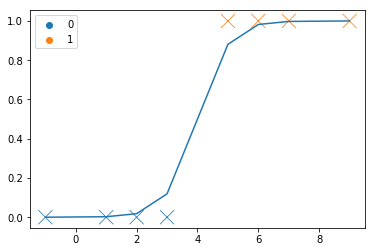

In [7]:
sns.scatterplot(x, y, marker="x", hue=y, s=200)
plt.plot(x, sigmoid(2 * x - 8))

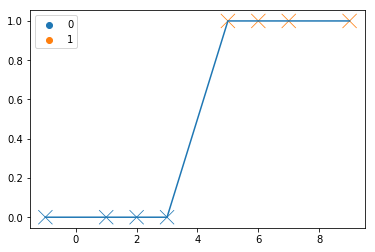

In [9]:
sns.scatterplot(x, y, marker="x", hue=y, s=200)
plt.plot(x, sigmoid(20* x - 80))

### Multidimensional case

#### Decision boundary:

$$ \theta_0 + \sum_{i = 1}^{n} x_i \; \theta_i = 0 $$

Let $ x_0 = 1 $

Decision boundary $$ \sum_{i = 1}^{n} x_i \; \theta_i = 0 $$

$$ \theta^{T} . X  = 0$$

Let $$ h_{\theta}(X) = sigmoid(\theta^{T} X) $$

## Probabilistic Interpretation

### Graphical Representation

<img src="./files/probabilistic_interpretation.png" width=60%>


* $$ P(Y| X, \theta) \sim Bernoulli(h_{\theta}(X)) = Bernoulli(sigmoid(\theta^{T} X)) $$


* $$ P(y|x, \theta) = h_{\theta}(x) ^ y * (1 - h_{\theta}(x)) ^ {1 - y} $$



* **Q1.** Find the negative log (conditional) likelihood given n pairs  $ (x_1, y_1), (x_2, y_2), ... (x_n, y_n) $

### Binary Cross Entropy Loss

$$ BCE(y, \hat{y}) = -1 * \big( y_i \; ln\; \hat{y} + (1 - y_i) \; ln \; (1 - \hat{y}) \big) $$  

$$ $$

<img src="./files/BCE.png" width=70%/>




* **Q2.** Find the gradient update rule for Logistic Regression with the BCE loss

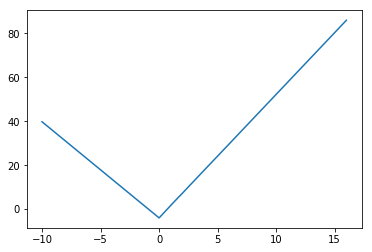

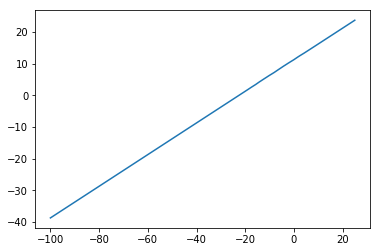

In [25]:
def BCE(a, b):
    x = np.array([-1, 1, 2, 3, 5, 6, 7, 9])
    y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
    logits = a + b*x
    probabilities = sigmoid(logits) ## h_theta(x)
    return np.mean(np.max(logits, 0) - logits * y + np.log(1 + np.exp(-np.abs(logits)))) # [ Look above ]

b = np.arange(-10, 16, 1/2000)
k = [BCE(-8, r) for r in b]

plt.plot(b, k)
plt.show()

a = np.arange(-100, 25, 1/2000)
k = [BCE(r, 2) for r in a]

plt.plot(a, k)
plt.show()

### Mean Squared Loss function for a Logistic Regression

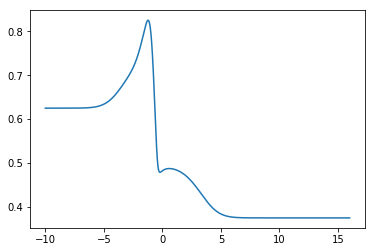

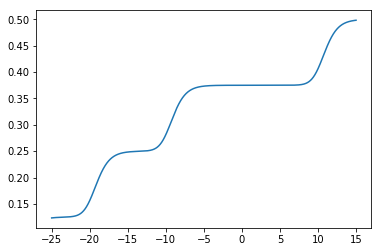

In [63]:
def f(a, b):
    x = np.array([-1, 1, 2, 3, 5, 6, 7, 9])
    y = np.array([0, 0, 0, 0, 1, 1, 1, 1])
    h = sigmoid(a + b*x)
    return np.mean((h - y) ** 2)

b = np.arange(-10, 16, 1/2000)
k = [f(4, r) for r in b]

plt.plot(b, k)
plt.show()

a = np.arange(-25, 15, 1/2000)
k = [f(r, 10) for r in a]

plt.plot(a, k)
plt.show()

## Note

### Convexity

* Satifies the linearity properity: Sum of two convex functions is a convex function, (Postive) Scalar multiplication to a convex function doesn't affect convexity. These two properties should help you justify why mean squared error is convex.


* The mean square error is convex in that the MSE is convex on its input and parameters by itself i.e. MSE is convex wrt to $ \hat{y} $. In the linear regression case, $ \hat{y} $ is linear in a and b and hence convex wrt a and b as well. 


* In logsitic regression, the logistic function makes the MSE Loss function non convex with respect to a and b. 


* Applied to the neural network case (e.g. with the model including parameters from the neural network), MSE is certainly not convex unless the network is trivial.

### Linear SVMs


* Linear Support Vector Machine is another Linear Classification model which we'll study later in the course